# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Load Data

In [4]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [16]:
uni_user = df['user_id'].unique().shape[0]
uni_item = df['item_id'].unique().shape[0]
print("Unique Users : ", uni_user)
print("Unique Items : ", uni_item)

Unique Users :  943
Unique Items :  1682


# User Item Matrix

In [17]:
ratings = np.zeros((uni_user, uni_item))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [30]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print("Sparsity {:4.2f}%".format(sparsity))

Sparsity 6.30%


# Cosine similarity

In [33]:
user_similarity = cosine_similarity(ratings)
item_similarity = cosine_similarity(ratings.T)

In [37]:
user_similarity[:4,:4]

array([[1.        , 0.16693098, 0.04745954, 0.06435782],
       [0.16693098, 1.        , 0.11059132, 0.17812119],
       [0.04745954, 0.11059132, 1.        , 0.34415072],
       [0.06435782, 0.17812119, 0.34415072, 1.        ]])

In [39]:
print(user_similarity.shape)
print(item_similarity.shape)
print(ratings.shape)

(943, 943)
(1682, 1682)
(943, 1682)


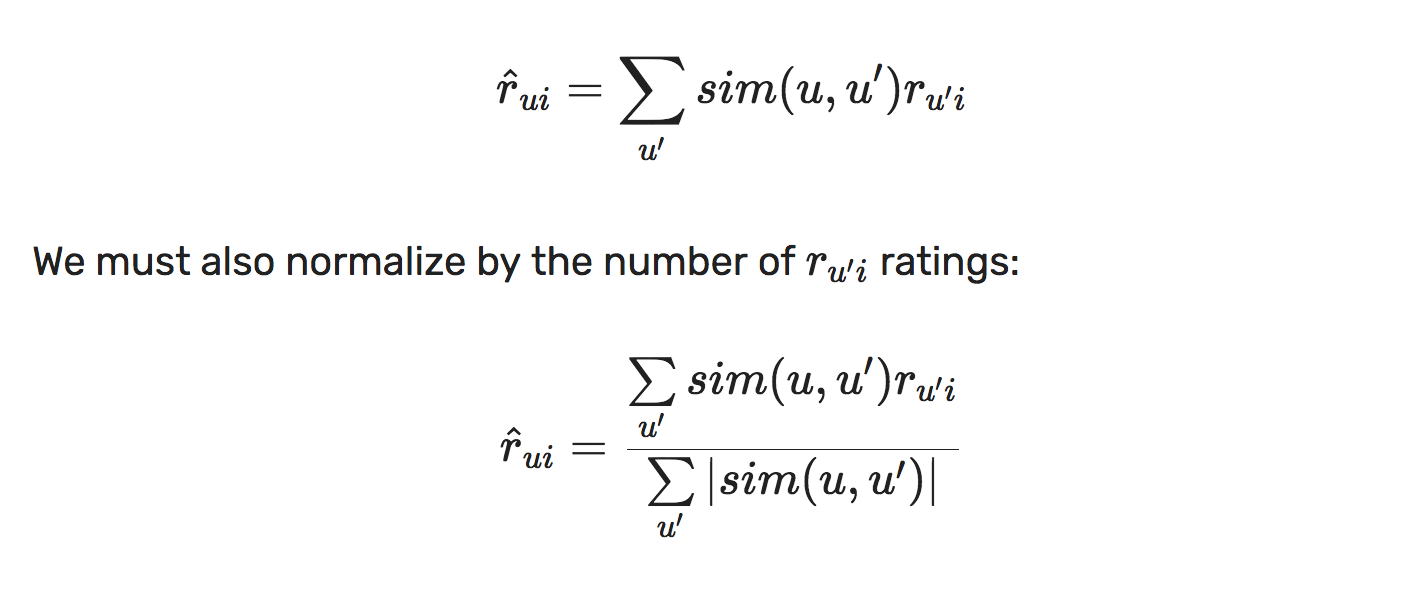

In [42]:
from IPython.display import Image
Image(filename='simi_formula.png')

In [47]:
user_pred = (user_similarity.dot(ratings))/np.array([np.abs(user_similarity).sum(axis=1)]).T
item_pred = (item_similarity.dot(ratings.T))/np.array([np.abs(item_similarity).sum(axis=1)]).T

# Mean square error method

In [49]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [55]:
train = pd.read_csv('ua.base', sep='\t',names=names)
test = pd.read_csv('ua.test', sep='\t', names=names)

In [65]:
print(train.shape)
print(test.shape)

(90570, 4)
(9430, 4)


In [79]:
ratings_test = np.zeros((test['user_id'].unique().shape[0], test['item_id'].unique().shape[0]))
print(ratings_test.shape)
for row in test.itertuples():
    if (row[2]-1) < ratings_test.shape[1]:
        ratings_test[row[1]-1, row[2]-1] = row[3]
ratings_test

(943, 1129)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# User error rate

In [80]:
get_mse(user_pred,ratings_test)

7.576948535971823

In [81]:
print(item_pred.shape)
print(ratings_test.shape)

(1682, 943)
(943, 1129)


# Item error rate

In [82]:
get_mse(item_pred, ratings_test.T)

11.05431115870883

In [83]:
user_pred

array([[2.42492083e+00, 7.58241451e-01, 4.44433098e-01, ...,
        5.37552717e-04, 6.51021154e-03, 7.36117851e-03],
       [1.88253580e+00, 3.25506086e-01, 3.02482424e-01, ...,
        3.36814306e-03, 2.77008816e-03, 1.91219324e-03],
       [1.32849217e+00, 2.90918284e-01, 2.36176026e-01, ...,
        8.35623444e-03, 2.61921448e-03, 1.18219930e-03],
       ...,
       [2.45321901e+00, 4.48412395e-01, 3.96938958e-01, ...,
        1.22401650e-03, 4.00566986e-03, 3.02918177e-03],
       [2.03994198e+00, 5.87603968e-01, 3.03290502e-01, ...,
        2.08310984e-03, 5.33460874e-03, 3.31510554e-03],
       [2.51325405e+00, 8.82071088e-01, 4.83121150e-01, ...,
        0.00000000e+00, 7.53072560e-03, 7.06815298e-03]])

In [89]:
names = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western' ]
item = pd.read_csv('u.item', sep='|', encoding='latin-1', names=names)

In [90]:
item

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Recommendation Function Based on items

In [220]:
indices_item = pd.Series(item.index)

#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations(title, similarity = 'item_similarity' ,kind = "item"):
    
    #print(df[item['movie title'] == title])
    # initializing the empty list of recommended movies
    recommended_movies = []
    if kind == "item":
        title_index = item[(item['movie title'] == title)].index[0]
        #print(title_index)
        # gettin the index of the movie that matches the title
        idx = indices_item[indices_item == title_index].index[0]

        # creating a Series with the similarity scores in descending order
        score_series = pd.Series(similarity[idx]).sort_values(ascending = False)

        # getting the indexes of the 10 most similar movies
        top_10_indexes = list(score_series.iloc[1:10].index)

        # populating the list with the titles of the best 10 matching movies
        for i in top_10_indexes:
            recommended_movies.append(list(df.index)[i])
        
    return recommended_movies

# Testing

In [221]:
r = recommendations('Toy Story (1995)',item_similarity)
for i in r:
    print(i, " --- ", item['movie title'][i])

49  ---  Star Wars (1977)
180  ---  Return of the Jedi (1983)
120  ---  Independence Day (ID4) (1996)
116  ---  Rock, The (1996)
404  ---  Mission: Impossible (1996)
150  ---  Willy Wonka and the Chocolate Factory (1971)
221  ---  Star Trek: First Contact (1996)
99  ---  Fargo (1996)
236  ---  Jerry Maguire (1996)


# Pearson Correlation method

In [222]:
from sklearn.metrics import pairwise_distances
item_correlation = 1 - pairwise_distances(ratings.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0.
user_correlation = 1 - pairwise_distances(ratings, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0.

In [223]:
print(user_correlation.shape)
print(ratings_test.shape)

(943, 943)
(943, 1129)


In [224]:
print(get_mse(item_correlation, ratings_test.T))

14.151848941123701


In [225]:
r = recommendations('Toy Story (1995)',item_correlation)
for i in r:
    print(i, " --- ", item['movie title'][i])

507  ---  People vs. Larry Flynt, The (1996)
743  ---  Michael Collins (1996)
1  ---  GoldenEye (1995)
362  ---  Sudden Death (1995)
236  ---  Jerry Maguire (1996)
438  ---  Amityville: A New Generation (1993)
423  ---  Children of the Corn: The Gathering (1996)
16  ---  From Dusk Till Dawn (1996)
224  ---  101 Dalmatians (1996)
